# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [11]:
# Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Create lists to hold info
city_name = []
city_lats = []
city_lngs = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
count = 1
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_lats.append(response["coord"]["lat"])
        city_lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {count} | {city}")
        count += 1
    except Exception:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
---------------------------
Processing Record 1 | new norfolk
Processing Record 2 | port elizabeth
Processing Record 3 | rikitea
Processing Record 4 | albany
Processing Record 5 | thompson
Processing Record 6 | ushuaia
Processing Record 7 | nouakchott
Processing Record 8 | ndago
Processing Record 9 | qasigiannguit
Processing Record 10 | mahebourg
Processing Record 11 | talnakh
Processing Record 12 | mwanza
Processing Record 13 | punta arenas
City not found. Skipping...
Processing Record 14 | ribeira grande
Processing Record 15 | hilo
Processing Record 16 | mar del plata
Processing Record 17 | georgetown
Processing Record 18 | luganville
Processing Record 19 | hobart
Processing Record 20 | vestmannaeyjar
Processing Record 21 | kenai
City not found. Skipping...
Processing Record 22 | saskylakh
Processing Record 23 | ketchikan
Processing Record 24 | chokurdakh
Processing Record 25 | lerwick
Processing Record 26 | tual
City not found. Skipping...
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Create a DataFrame from the lists containing the collected data
weather_dict = {
    "City" : city_name,
    "Latitude" : city_lats,
    "Longitude" : city_lngs,
    "Max Temp" : temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : date
}
weather_df = pd.DataFrame(weather_dict)
# Saving DataFrame to a .csv
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,12.06,69,81,4.92,AU,1662872718
1,Port Elizabeth,-33.9180,25.5701,14.62,88,17,2.24,ZA,1662872719
2,Rikitea,-23.1203,-134.9692,22.86,69,19,5.30,PF,1662872719
3,Albany,42.6001,-73.9662,19.70,88,100,0.77,US,1662872719
4,Thompson,55.7435,-97.8558,9.91,64,100,3.63,CA,1662872720
...,...,...,...,...,...,...,...,...,...
558,Garissa,-0.4536,39.6401,24.11,74,35,6.68,KE,1662873100
559,Brae,60.3964,-1.3530,10.02,83,45,2.49,GB,1662873101
560,Ouadda,8.0777,22.4007,19.60,98,91,1.28,CF,1662873102
561,Verkhoyansk,67.5447,133.3850,9.38,45,84,4.51,RU,1662873102


In [23]:
# Checking summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.00000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.932102,19.28090,18.629876,70.932504,54.825933,3.423694,1.662873e+09
std,34.236900,89.76428,8.522871,20.676866,40.098964,2.456633,1.251346e+02
min,-54.800000,-175.20000,-0.490000,9.000000,0.000000,0.000000,1.662872e+09
25%,-6.926700,-59.73335,10.920000,57.000000,11.500000,1.590000,1.662873e+09
50%,24.344800,24.06530,19.770000,75.000000,65.000000,2.780000,1.662873e+09
75%,51.242250,100.33540,26.045000,88.000000,98.000000,4.630000,1.662873e+09
max,78.218600,179.31670,38.640000,100.000000,100.000000,14.750000,1.662873e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.
high_humidities = weather_df[(weather_df["Humidity"] >= 100)].index
high_humidities

Int64Index([69, 95, 180, 292, 334, 358, 399, 406, 433, 477, 512, 549, 550,
            557],
           dtype='int64')

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(high_humidities, inplace=False)
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,12.06,69,81,4.92,AU,1662872718
1,Port Elizabeth,-33.9180,25.5701,14.62,88,17,2.24,ZA,1662872719
2,Rikitea,-23.1203,-134.9692,22.86,69,19,5.30,PF,1662872719
3,Albany,42.6001,-73.9662,19.70,88,100,0.77,US,1662872719
4,Thompson,55.7435,-97.8558,9.91,64,100,3.63,CA,1662872720
...,...,...,...,...,...,...,...,...,...
558,Garissa,-0.4536,39.6401,24.11,74,35,6.68,KE,1662873100
559,Brae,60.3964,-1.3530,10.02,83,45,2.49,GB,1662873101
560,Ouadda,8.0777,22.4007,19.60,98,91,1.28,CF,1662873102
561,Verkhoyansk,67.5447,133.3850,9.38,45,84,4.51,RU,1662873102


In [26]:
# Exporting clean data to a .csv
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

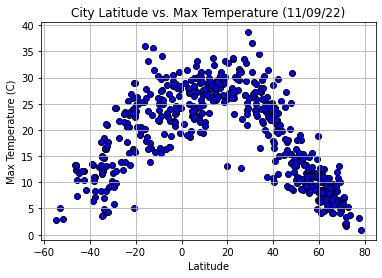

In [29]:
# Creating a scatterplot
y_values = clean_city_data["Max Temp"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (11/09/22)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../output_data/figure1.png")

plt.show()

## Latitude vs. Humidity Plot

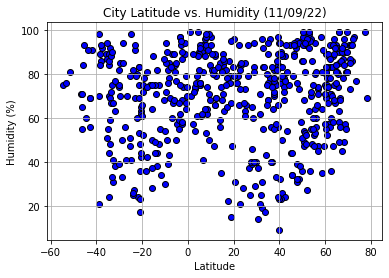

In [30]:
# Creating a scatterplot
y_values = clean_city_data["Humidity"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title("City Latitude vs. Humidity (11/09/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../output_data/figure2.png")

plt.show()

## Latitude vs. Cloudiness Plot

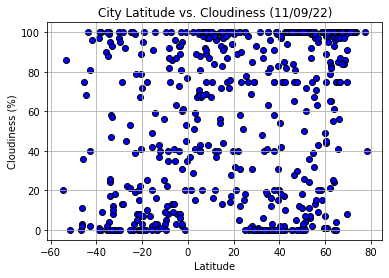

In [31]:
# Creating a scatterplot
y_values = clean_city_data["Cloudiness"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (11/09/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../output_data/figure3.png")

plt.show()

## Latitude vs. Wind Speed Plot

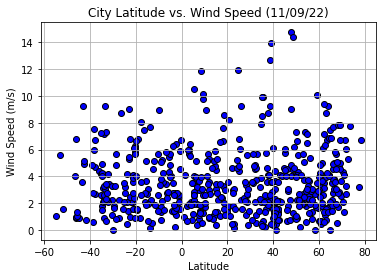

In [32]:
# Creating a scatterplot
y_values = clean_city_data["Wind Speed"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (11/09/22)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../output_data/figure4.png")

plt.show()

## Linear Regression

In [33]:
# Creating separate DataFrames for the northern and southern hemisphere
northern_hem_df= clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hem_df= clean_city_data.loc[clean_city_data["Latitude"] <= 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8471010757474517
The r-squared value is: 0.71758023253249


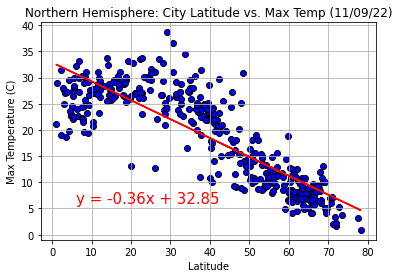

In [41]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Max Temp"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 6), fontsize=15, color="r")
plt.title("Northern Hemisphere: City Latitude vs. Max Temp (11/09/22)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure5.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7334266835603033
The r-squared value is: 0.5379147001582653


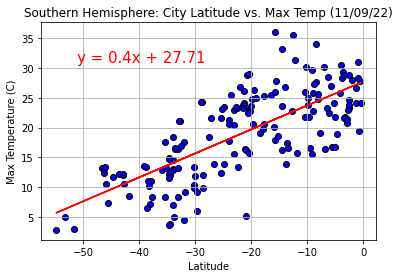

In [42]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Max Temp"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-51, 31), fontsize=15, color="r")
plt.title("Southern Hemisphere: City Latitude vs. Max Temp (11/09/22)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure6.png")

plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03488777337428195
The r-squared value is: 0.0012171567310152566


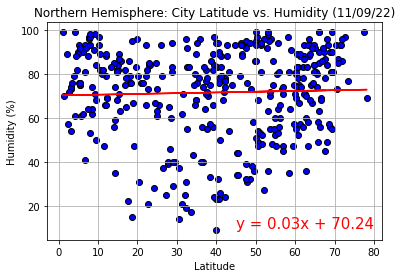

In [51]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Humidity"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="r")
plt.title("Northern Hemisphere: City Latitude vs. Humidity (11/09/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure7.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.006791542877599115
The r-squared value is: 4.612505465826727e-05


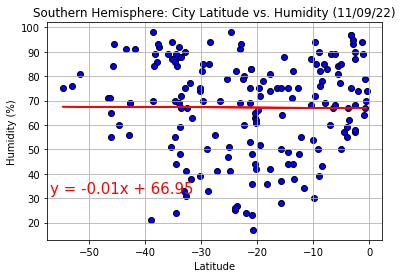

In [55]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Humidity"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-57, 32), fontsize=15, color="r")
plt.title("Southern Hemisphere: City Latitude vs. Humidity (11/09/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure8.png")

plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06133724028872827
The r-squared value is: 0.0037622570462371905


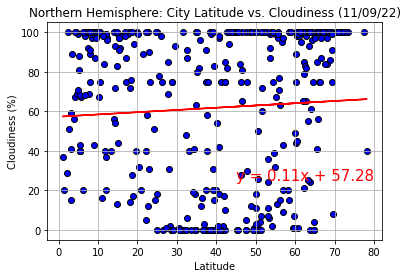

In [57]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Cloudiness"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 25), fontsize=15, color="r")
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (11/09/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure9.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05851904449423452
The r-squared value is: 0.0034244785685181994


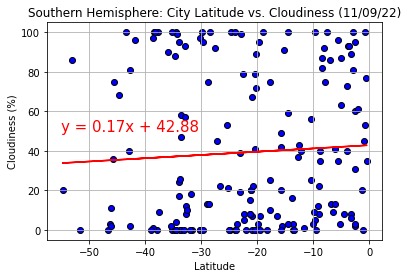

In [59]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Cloudiness"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 50), fontsize=15, color="r")
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (11/09/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure10.png")

plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05510465879824444
The r-squared value is: 0.003036523421270938


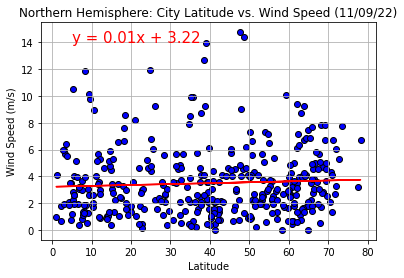

In [61]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Wind Speed"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5, 14), fontsize=15, color="r")
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (11/09/22)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure11.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02734805107806173
The r-squared value is: 0.0007479158977682733


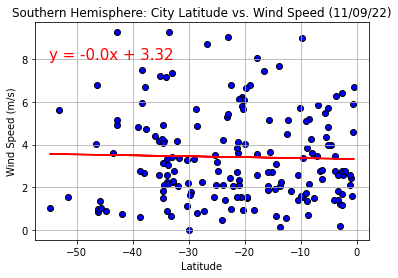

In [63]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Wind Speed"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 8), fontsize=15, color="r")
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (11/09/22)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../output_data/figure12.png")

plt.show()